#### Impedindo notebook de escrever bytecode

In [13]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [14]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [15]:
from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier, ClassifiersComparison
from random import choices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Lendo dataset

In [16]:
dataset = PointDataset("./data.dat", labelTranslation={'0':-1, '1':1})
points = dataset.getPoints()

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 1)

In [17]:
CHclf01 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier01", coordinate1=0, coordinate2=1, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 2)

In [18]:
CHclf02 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier02", coordinate1=0, coordinate2=2, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (1, 2)

In [19]:
CHclf12 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier12", coordinate1=1, coordinate2=2, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (2, 3)

In [20]:
CHclf23 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier23", coordinate1=2, coordinate2=3, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (3, 4)

In [21]:
CHclf34 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier34", coordinate1=3, coordinate2=4, nFolds=5)

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (1, 4)

In [22]:
CHclf14 = ConvexHullClassifier.buildInstance(name="ConvexHullClassifier14", coordinate1=1, coordinate2=4, nFolds=5)

#### Criando construtor de instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [23]:
KNNclf = KNNClassifier.buildInstance(maxK=30, nFolds=5)

#### Comparação da diferença média para as métricas _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_ entre os classificadores par a par

Para efeutar a comparação, um bootstrapping foi feito usando 100 amostras com reposição e 100 indivíduos em cada uma delas.

In [24]:
clfComparison = ClassifiersComparison(points, [KNNclf, CHclf01, CHclf02, CHclf12, CHclf23, CHclf34, CHclf14], sampleSize=100, nSamples=50)
meanDiff = clfComparison.run()
meanDiff

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  re

,Precision,Recall,F1,Accuracy,Label
0,-0.077778,-0.230769,-0.077778,0.000000,KNNClassifier/ConvexHullClassifier01
1,0.321839,-0.833333,0.321839,0.266667,KNNClassifier/ConvexHullClassifier01
2,0.327273,-0.243697,0.327273,0.233333,KNNClassifier/ConvexHullClassifier01
3,0.178571,-0.700000,0.178571,0.300000,KNNClassifier/ConvexHullClassifier01
4,0.214286,-0.250000,0.214286,0.200000,KNNClassifier/ConvexHullClassifier01
...,...,...,...,...,...
2095,0.000000,0.000000,0.000000,0.000000,ConvexHullClassifier14/ConvexHullClassifier34
2096,NaN,-1.000000,NaN,0.000000,ConvexHullClassifier14/ConvexHullClassifier34
2097,NaN,-1.000000,NaN,-0.133333,ConvexHullClassifier14/ConvexHullClassifier34
2098,-0.033333,0.000000,-0.033333,-0.033333,ConvexHullClassifier14/ConvexHullClassifier34


#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 1)

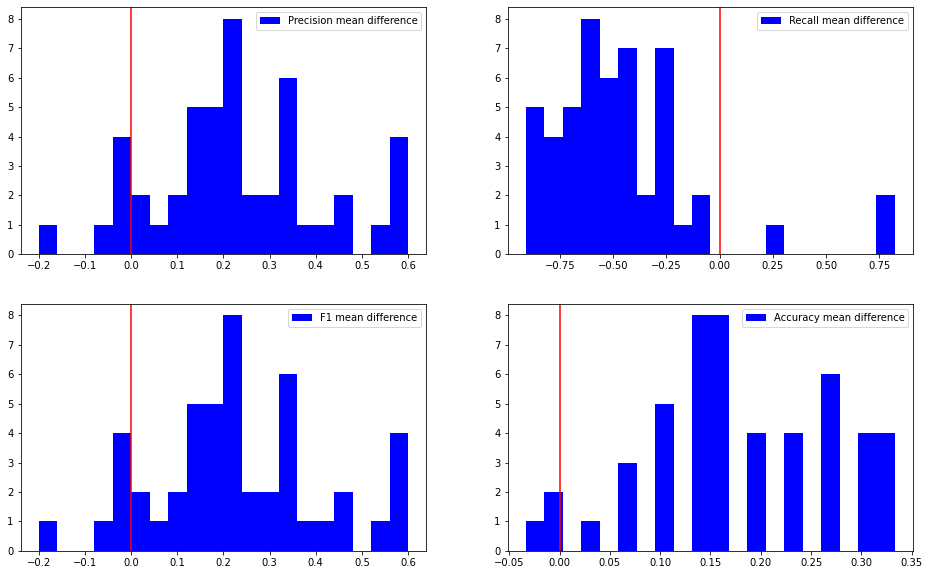

In [25]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier01')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 2)

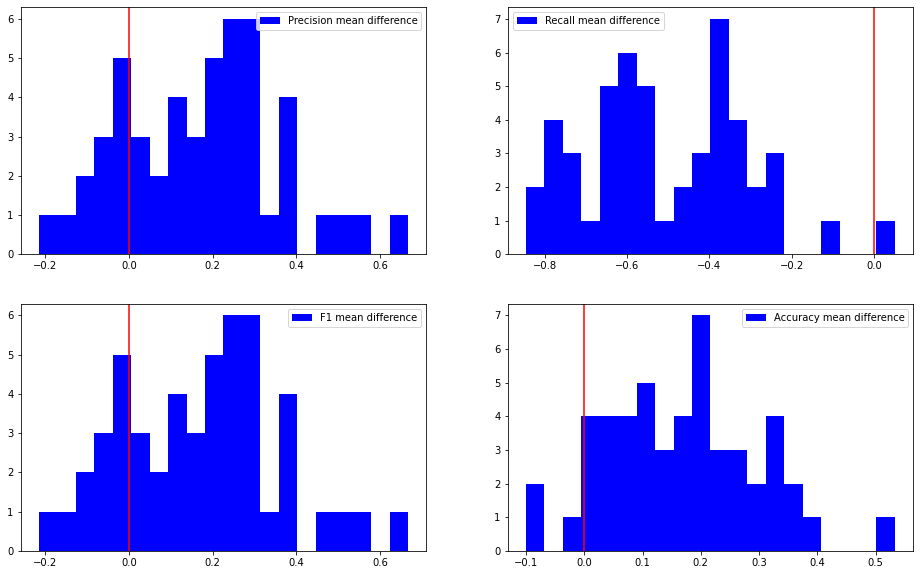

In [26]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier02')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (1, 2)

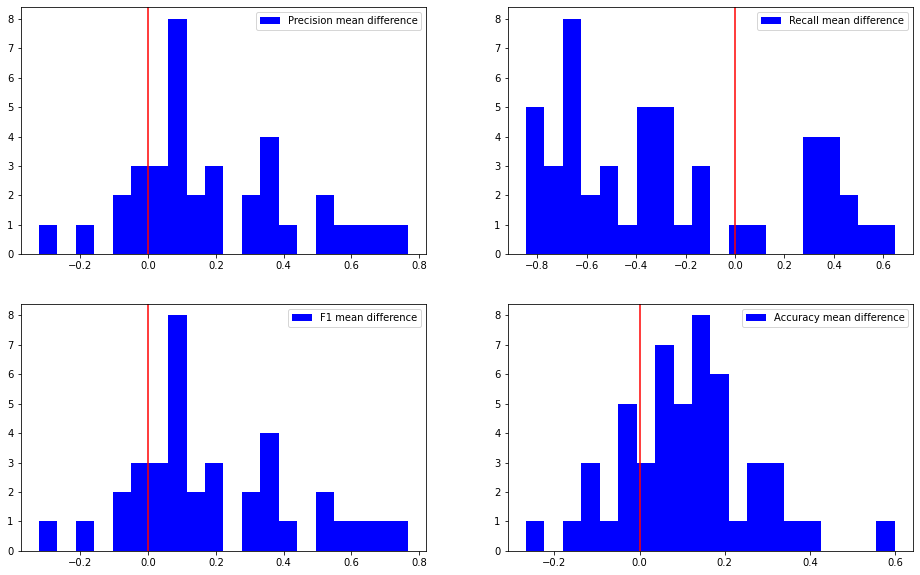

In [27]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier12')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (2, 3)

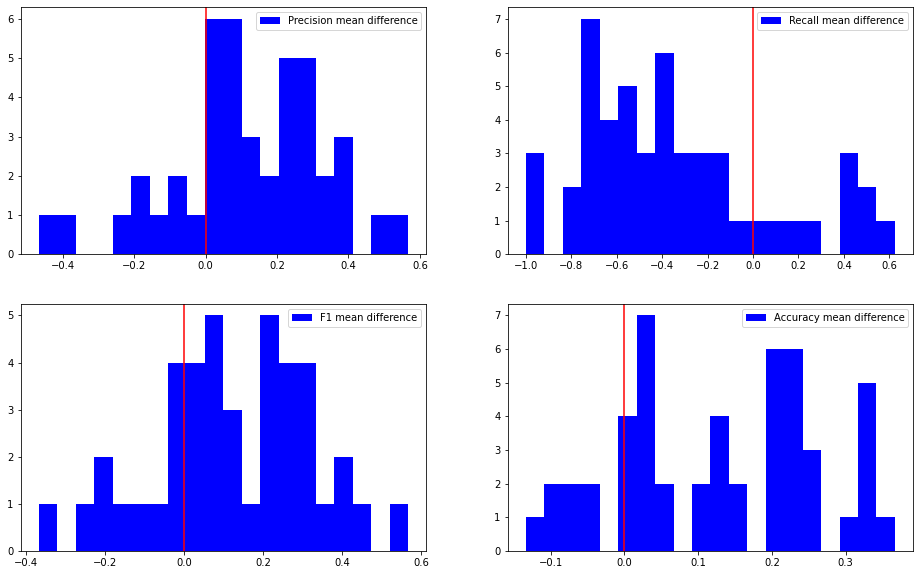

In [28]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier23')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (3, 4)

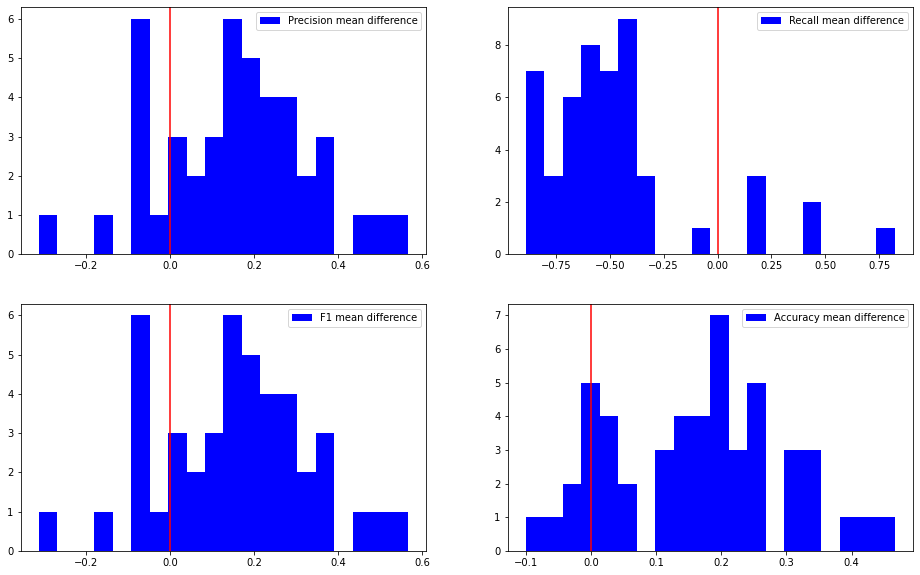

In [29]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier34')

#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (1, 4)

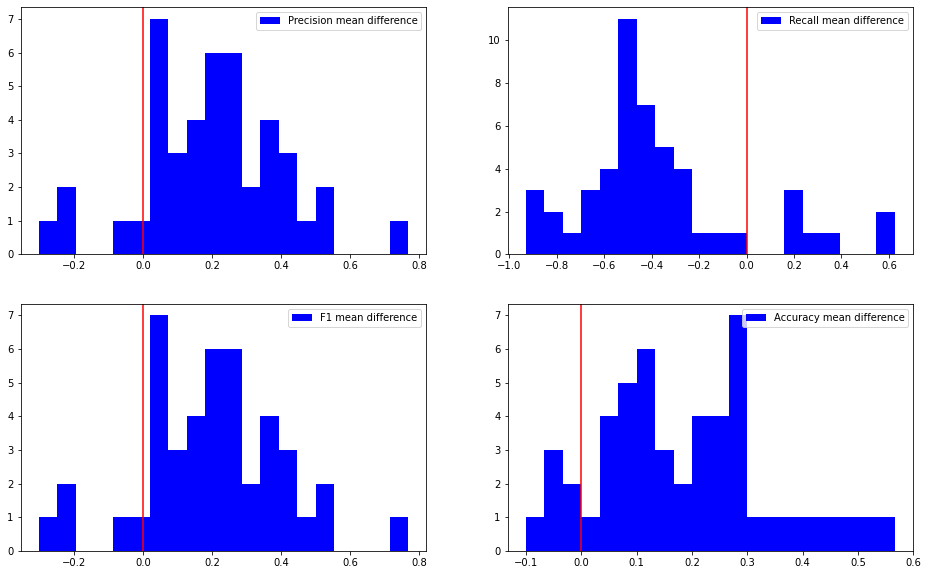

In [30]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier14')